In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [14]:
customer_df = pd.read_csv('data/customer.csv')

customer_df.head()

,Hour,Monthly_Frequency_Customers
0,7,259
1,8,250
2,9,346
3,10,335
4,11,722


(array([  2.,   2.,   7.,   6.,  18.,  27.,  41.,  65., 129., 223., 392.,
        534., 712., 817., 831., 721., 626., 565., 541., 609., 654., 702.,
        648., 378., 156.,  63.,  17.,   5.,   3.,   2.]),
 array([-11.55      , -10.21833333,  -8.88666667,  -7.555     ,
         -6.22333333,  -4.89166667,  -3.56      ,  -2.22833333,
         -0.89666667,   0.435     ,   1.76666667,   3.09833333,
          4.43      ,   5.76166667,   7.09333333,   8.425     ,
          9.75666667,  11.08833333,  12.42      ,  13.75166667,
         15.08333333,  16.415     ,  17.74666667,  19.07833333,
         20.41      ,  21.74166667,  23.07333333,  24.405     ,
         25.73666667,  27.06833333,  28.4       ]),
 <BarContainer object of 30 artists>)

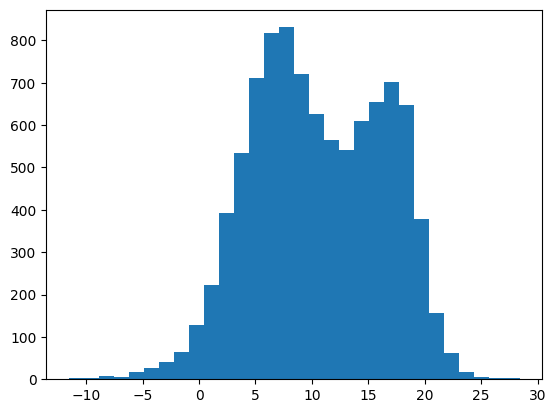

In [32]:
weather_df = pd.read_csv('data/vancouver_weather.csv')

weather_df.head()

plt.hist(weather_df['avg_temperature'], bins = 30)

In [34]:
weather_kde = gaussian_kde(weather_df['avg_temperature'])

<function matplotlib.pyplot.show(close=None, block=None)>

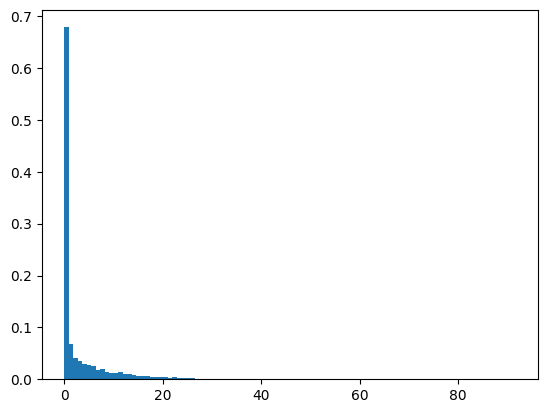

In [38]:
plt.hist(weather_df['precipitation'], bins = 100, density = True)
plt.show

In [40]:
T_min = weather_df['avg_temperature'].min()
T_max = weather_df['avg_temperature'].max()
P_min = weather_df['precipitation'].min()
P_max = weather_df['precipitation'].max()

print(weather_df['precipitation'].mean())

3.2037068239258635


In [16]:
weather_march = weather_df[weather_df['month'] == 3]

weather_march = weather_march[['year', 'avg_temperature', 'precipitation']]

weather_march = weather_march.groupby('year').mean().reset_index()

weather_march['consumer'] = 5742

weather_march.head()

,year,avg_temperature,precipitation,consumer
0,1997,6.274839,7.741935,5742
1,1998,7.885484,2.612903,5742
2,1999,6.345161,3.383871,5742
3,2000,6.967097,3.522581,5742
4,2001,6.636452,3.877419,5742


In [17]:
## c(T,P) = C_0 + a(T-T_0) - b(P-P_0)
## a,b based on the month of March

T_0 = weather_df['avg_temperature'].mean()
P_0 = weather_df['precipitation'].mean()
C_0 = 4000
T = weather_march['avg_temperature'].mean()
P = weather_march['precipitation'].mean()
C = 5742

# income_march = 


In [ ]:
## Monte Carlo

t = np.linspace(0,365,1000)

N = 2000
Net_income_mc = []
# T_0 = 
# P_0 = 
# C_0 = 
# a =
# b = 
# income = 

for i in range(N): 
    T = weather_kde.resample(N)
    P = np.random.exponential(weather_df['precipitation'].mean(), size = N)
    customer = C_0 + a* (T-T_0) - b * (P-P_0)
    Num_customer = np.max(customer, 0)
    net_income = Num_customer * income
    Net_income_mc.append(net_income)
    plt.plot(t,net_income,'-c',alpha=0.3,linewidth=0.5)

#convert to array to find mean -- python stores as list, need array
Net_income_mc_ave = np.array(Net_income_mc)

# Net_income_determin = income_march * t

plt.plot(t,Net_income_mc_ave.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t,Net_income_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()